In [39]:
# Imports
import glob
import numpy as np
import os.path as path
from scipy import misc
import matplotlib.pyplot as plt

In [40]:
# IMAGE_PATH should be the path to the downloaded planesnet folder
IMAGE_PATH = 'C:/Users/ICT01_04/Downloads/planesnet/planesnet'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

In [41]:
# Load the images
from matplotlib.pyplot import imread
import cv2 as cv
images = [cv.imread(path) for path in file_paths]
images = np.asarray(images)
# Get image size
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

[20 20  3]


In [42]:
# Scale
images = images / 255
# Read the labels from the filenames
n_images = images.shape[0]
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    labels[i] = int(filename[0])
    
# Split into test and training sets
TRAIN_TEST_SPLIT = 0.9

# Split at the given index
split_index = int(TRAIN_TEST_SPLIT * n_images)
shuffled_indices = np.random.permutation(n_images)
train_indices = shuffled_indices[0:split_index]
test_indices = shuffled_indices[split_index:]

# Split the images and the labels
x_train = images[train_indices, :, :, :]
y_train = labels[train_indices]
x_test = images[test_indices, :, :, :]
y_test = labels[test_indices]    

In [43]:
def visualize_data(positive_images, negative_images):
    # INPUTS
    # positive_images - Images where the label = 1 (True)
    # negative_images - Images where the label = 0 (False)

    figure = plt.figure()
    count = 0
    for i in range(positive_images.shape[0]):
        count += 1
        figure.add_subplot(2, positive_images.shape[0], count)
        plt.imshow(positive_images[i, :, :])
        plt.axis('off')
        plt.title("1")

        figure.add_subplot(1, negative_images.shape[0], count)
        plt.imshow(negative_images[i, :, :])
        plt.axis('off')
        plt.title("0")
    plt.show()

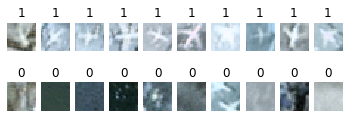

In [44]:
# Number of positive and negative examples to show
N_TO_VISUALIZE = 10

# Select the first N positive examples
positive_example_indices = (y_train == 1)
positive_examples = x_train[positive_example_indices, :, :]
positive_examples = positive_examples[0:N_TO_VISUALIZE, :, :]

# Select the first N negative examples
negative_example_indices = (y_train == 0)
negative_examples = x_train[negative_example_indices, :, :]
negative_examples = negative_examples[0:N_TO_VISUALIZE, :, :]

# Call the visualization function
visualize_data(positive_examples, negative_examples)

In [46]:
# Imports
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score
from datetime import datetime

ImportError: cannot import name 'PY2' from 'scipy._lib.six' (C:\Users\ICT01_04\Anaconda3\lib\site-packages\scipy\_lib\six.py)